<a href="https://colab.research.google.com/github/igormatheusdiniz/ri_lab_02/blob/master/ri_lab2_igor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from collections import Counter


In [0]:
url = 'https://raw.githubusercontent.com/Benardi/ri_lab_01/master/output/results.csv'

Utilizei a base de dados de Benardi, e por motivos de não precisar importar o .csv toda vez ao inicializar o colab, defini a url em meu lab.

In [0]:
dataframe = pd.read_csv(url)

# Tratamento dos dados

Se faz necessário o tratamento dos dados poder captar da melhor maneira o conteúdo dos textos no arquivo.

In [0]:
dataframe = dataframe[['text']]
dataframe['ajusted_text'] = dataframe.text.apply(lambda x: re.sub('[^0-9A-ZÀ-Úa-zà-ú\']', ' ', x.lower()))

Abaixo podemos ver a tabela do texto original acompanhado do texto tratado.

In [27]:
dataframe

,text,ajusted_text
0,A juíza federal Ivani Silva da Luz de Brasíli...,a juíza federal ivani silva da luz de brasíli...
1,Menos de 24 horas depois de a juíza federal Iv...,menos de 24 horas depois de a juíza federal iv...
2,Quando determinou que de 31 de março 1964 u...,quando determinou que de 31 de março 1964 u...
3,Quando era pequeno Luisa e Gabriel se preo...,quando era pequeno luisa e gabriel se preo...
4,Desde a manhã da última segunda-feira e ...,desde a manhã da última segunda feira e ...
5,Rosângela Serra Paraná não sabe quantos anos t...,rosângela serra paraná não sabe quantos anos t...
6,Trajetória similar tiveram outros vários agent...,trajetória similar tiveram outros vários agent...
7,A devoção dos cristãos evangélicos em seu apoi...,a devoção dos cristãos evangélicos em seu apoi...
8,O homem mais famoso da era vitoriana o “poeta...,o homem mais famoso da era vitoriana o poeta...
9,Depois de inclusive o da crítica internacion...,depois de inclusive o da crítica internacion...


# Questão 1

Abaixo criamos uma lista com todas as palavras do texto, sem tratar as repetições da mesmas, definindo então um conjunto total. Podemos ver a tabela com todas as palavras.

In [0]:
word_list = ' '.join(dataframe.ajusted_text.values).split(' ')
list_aux = []

for word in word_list:
  if len(word) >= 1:
    list_aux.append(word)

A tabela words é uma tabela criada para armazenar cada palavra do dicionário tratada de acordo com as regras impostas na descrição. Logo após é criado uma tabela word_counts para registrar a frequencia de cada palavra.

As variáveis descritar no código são

### n_wars: número de documentos (total de textos)
### total_words: número de palavras considerando as repetições, e podem ser encontradas na list_aux
### vocabulary_size: contagem do número de palavras desconsiderando as repetições e podem ser calculadas através do número de linhas da tabela words_count
### more_thousand: número de palavras que ocorrem mais de 1000x
### once: número de palavras que ocorrem apenas uma vez 

In [29]:
words = pd.DataFrame(list_aux, columns=['word'])
word_counts = words.word.value_counts().reset_index()
word_counts.columns = ['word', 'freq']
words_more_thousand = word_counts.loc[(word_counts['freq'] >= 1000)]
words_once = word_counts.loc[(word_counts['freq'] == 1)]

n_raws = dataframe.shape[0]
totalWords = len(list_aux)
vocabulary_size = word_counts.shape[0]
more_thousand = words_more_thousand.shape[0]
once = words_once.shape[0]

print('=================================')
print('|   Total Documents   | ', n_raws, '   |')
print('| Tot. Word Ocurrencs | ', totalWords, '|')
print('|   Vocabulary Size   | ', vocabulary_size, ' |')
print('| Words ocurring >1000| ', more_thousand, '    |')
print('| Words ocurring once | ', once, ' |')
print('=================================')

df2 = pd.DataFrame(np.array([['Total Documents', n_raws], ['Total Word Ocurrences', totalWords], ['Vocabulary size', vocabulary_size], 
                             ['Words Ocurring >1000', more_thousand], ['Words Ocurring once', once]]), columns=['Parametro', 'Valor'])

df2


|   Total Documents   |  249    |
| Tot. Word Ocurrencs |  216705 |
|   Vocabulary Size   |  22988  |
| Words ocurring >1000|  23     |
| Words ocurring once |  11214  |


,Parametro,Valor
0,Total Documents,249
1,Total Word Ocurrences,216705
2,Vocabulary size,22988
3,Words Ocurring >1000,23
4,Words Ocurring once,11214


Abaixo podemos ver a tabela com todas as palavras.

In [30]:
words

,word
0,a
1,juíza
2,federal
3,ivani
4,silva
5,da
6,luz
7,de
8,brasília
9,proibiu


# Questão 2

Para adicionar as colunas de rank(r), Probabilidade(Pr) e C(rPr), implementa-se o código abaixo.

In [0]:
word_counts['r'] = word_counts.freq.rank(ascending=False, method='first')
word_counts['Pr'] =  (word_counts.freq / totalWords)*100
word_counts['rPr'] = (word_counts.r*word_counts.Pr)/100


Selecionando as 50 palavras mais frequentes dentre todo o resultado temos a tabela abaixo.

In [32]:
word_counts.loc[0:50]

,word,freq,r,Pr,rPr
0,de,10211,1.0,4.711936,0.047119
1,a,7496,2.0,3.459080,0.069182
2,o,6610,3.0,3.050230,0.091507
3,que,6554,4.0,3.024388,0.120976
4,e,5734,5.0,2.645993,0.132300
5,do,3465,6.0,1.598948,0.095937
6,em,3381,7.0,1.560186,0.109213
7,da,3012,8.0,1.389908,0.111193
8,um,2698,9.0,1.245010,0.112051
9,para,2323,10.0,1.071964,0.107196


# Questão 3


In [0]:
%matplotlib inline

## Gráfico de freq VS. rank para palvras

É possivel calcular o C de melhor ajuste atráves da mediana dos valores de  rPr pela probabilidade. Ao plotar-se uma reta com esse C de reajuste e a curva obtida pelos pontos das palavras frêquencia vs. rank percebe-se que os pontos estão próximos do ideal.

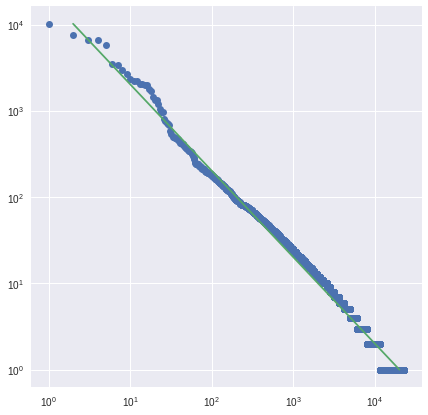

In [34]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
plt.plot(word_counts["r"], 
         word_counts["freq"],
         linestyle='',
         marker='o')

#considerando que o melhor ajuste para o C é:
word_counts['pred'] = np.median(word_counts.rPr) / (word_counts.Pr/100)

plt.plot(word_counts["pred"],
         word_counts["freq"],
         linestyle='-',
         marker='')

## Gráfico de frequência VS. rank para bigramas 

Para gerar os bigramas, o procedimento realizado foi:
1 - Utilizar a biblioteca ntlk para tokenizar em bigramas a list_aux que contém todas as palavras individuais.
2 - Como o objeto gerado não é uma lista de bigramas, converteu-se em lista.
3 - Como tinha-se tuplas com dois valores, e o desejado era uma tupla com um unico valor de duas strings, percorreu-se toda a lista e realizou-se o tratamento de cada caso.

In [0]:
#GERANDO OS BIGRAMAS

bigram = nltk.bigrams(list_aux)
list_bigram_aux = []
bigram_aux = ''

final_bigram = list(bigram)
for item in final_bigram:
  bigram_aux = item[0]+' '+item[1]
  list_bigram_aux.append(bigram_aux)

Para contar a  frequência de cada bigrama, o procedimento foi o mesmo da contagem de frequência para palavras únicas. É possível perceber a frequência dos bigramas na tabela abaixo.

In [36]:
#CONTANDO A FREQUENCIA DOS BIGRAMAS

bigramWords = pd.DataFrame(list_bigram_aux, columns=['bigram'])
bigram_counts = bigramWords.bigram.value_counts().reset_index()
bigram_counts.columns = ['bigram', 'freq']


bigram_counts

,bigram,freq
0,que o,500
1,o que,395
2,que a,377
3,de um,361
4,com o,327
5,com a,320
6,e a,318
7,e o,283
8,que não,276
9,para a,259


O procedimento para o rank, Probabilidade e "C" dos bigramas também foi semelhante ao de palavras únicas.

In [0]:
#PROBABILIDADE E C DOS BIGRAMAS

bigram_counts['r'] = bigram_counts.freq.rank(ascending=False, method='first')
bigram_counts['Pr'] =  (bigram_counts.freq / totalWords)*100
bigram_counts['rPr'] = (bigram_counts.r*word_counts.Pr)/100


### Tabela de frequência dos bigramas

In [38]:
bigram_counts

,bigram,freq,r,Pr,rPr
0,que o,500,1.0,0.230728,0.047119
1,o que,395,2.0,0.182275,0.069182
2,que a,377,3.0,0.173969,0.091507
3,de um,361,4.0,0.166586,0.120976
4,com o,327,5.0,0.150896,0.132300
5,com a,320,6.0,0.147666,0.095937
6,e a,318,7.0,0.146743,0.109213
7,e o,283,8.0,0.130592,0.111193
8,que não,276,9.0,0.127362,0.112051
9,para a,259,10.0,0.119517,0.107196


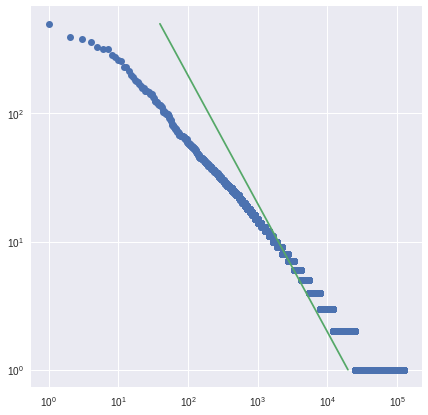

In [39]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
plt.plot(bigram_counts["r"], 
         bigram_counts["freq"],
         linestyle='',
         marker='o')

#considerando que o melhor ajuste para o C é:
bigram_counts['pred'] = np.mean(bigram_counts.rPr) / (bigram_counts.Pr/100)

plt.plot(bigram_counts["pred"],
         bigram_counts["freq"],
         linestyle='-',
         marker='')


# Questão 4

In [40]:
#código para gerar uma tupula token,frequencia para facilitar a implementação da questão
serie = pd.Series()
freq_tk = Counter(list_aux) 

#função criada com o intuito de retornar a quantidade de palavras que ocorrem n vezes
def couting_times(quantity):
  counter = 0
  
  for word in freq_tk.items():
    if (word[1] == quantity):
      counter += 1
  
  return counter

#arrays auxiliares para criação do novo dataframe
results_of_counting = []
aux_results = []

tibleq4 = pd.DataFrame([1,2,3,4,5,6,7,8,9,10], columns=['num'])

#calculo da proporção esperada de acordo a fórmula exibida em sala
tibleq4['PredictedProportion'] = 1.0 / (tibleq4.num * (tibleq4.num + 1))

#armazenamento dos resultados da quantidade das palavras que ocorrem n vezes com a finalidade de gerar uma nova coluna
for i in range(1,11):
  results_of_counting.append(couting_times(i))

tibleq4['ActualProportion'] = 0  


for n in results_of_counting:
  actualProportion = n / vocabulary_size
  aux_results.append(actualProportion)
  

tibleq4['ActualProportion'] = aux_results
tibleq4['Actual number of words'] = results_of_counting


tibleq4

,num,PredictedProportion,ActualProportion,Actual number of words
0,1,0.500000,0.487820,11214
1,2,0.166667,0.164216,3775
2,3,0.083333,0.080607,1853
3,4,0.050000,0.050374,1158
4,5,0.033333,0.035453,815
5,6,0.023810,0.023317,536
6,7,0.017857,0.018488,425
7,8,0.013889,0.015138,348
8,9,0.011111,0.012354,284
9,10,0.009091,0.011180,257


In [41]:
results_of_counting

[11214, 3775, 1853, 1158, 815, 536, 425, 348, 284, 257]